# 代码

In [1]:
from name_exist import *

# 超参数

In [2]:
args = {
    'domain': 'vogel.de',
    'option_lsh': 'ssdeep',  # 使用LSH算法评估网页相似度: ssdeep
    'threads': 30,
    'dns_type': 1,
    'fuzzer_num': 600 , # 0-np.inf，inf代表输出所有的生成结果
    'threshold_value': 0.15,
    'tld_all': True,
    'fuzzers': [
#         'bitsquatting', 'vowel-swap', 'cyrillic', 'homoglyph', 'repetition','various'
        'addition',
        'hyphenation',
        'insertion', 'omission', 'replacement',
        'subdomain', 'transposition'
    ],
    'useragent': USER_AGENT_STRING,
    'request_timeout_http': 1.5
}

# 主程序

In [3]:
import time

t1=time.time()
url = UrlParser(args['domain'])
fuzz = fuzzer_plus.Fuzzer(domain=url.domain, tld_all=args['tld_all'], threshold_value=args['threshold_value'],
                          top=args['fuzzer_num'])
fuzz.generate(args['fuzzers'])
domains = list(fuzz.domains_tld)
len_fuzz=len(domains)

In [4]:
pd.DataFrame(domains)

,fuzzer,domain,score
0,addition,voglel.de,2.251629
1,addition,ovogel.de,2.251629
2,addition,vogelg.de,2.251629
3,addition,voogel.de,2.251629
4,addition,gvogel.de,2.251629
...,...,...,...
12061,tld-swap,vogek.ro,2.750000
12062,tld-swap,vogeu.ro,2.750000
12063,tld-swap,vogpl.ro,2.750000
12064,tld-swap,vobel.ro,2.750000


In [5]:
_ = min(args['fuzzer_num'], len(domains))
domains = domains[:_].copy()
t2=time.time()
print("Fuzzer耗时：{:.2f}s".format(t2-t1))

Fuzzer耗时：1.47s


In [6]:
# t3=time.time()
# domains = search_status_code(domains, args['request_timeout_http'], args['threads'])
save_domains(domains, "{}生成的混淆域名".format(url.domain))
# t4=time.time()
# print("request发包过滤耗时：{:.2f}s".format(t4-t3))

文件：D:\Desktop\上班\dnstwist-20230509\Similar_domain_name_detection\example\file\vogel.de生成的混淆域名.csv保存成功


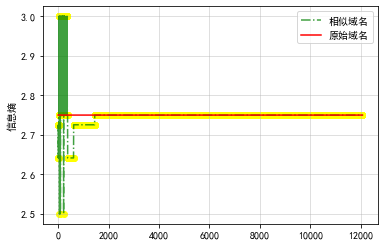

In [7]:
fuzz._make_fig(url.domain)

In [8]:
# domains = search_dns(domains, _type=args['dns_type'], tnum=args['threads'])
# save_domains(domains, "DNS过滤后的混淆域名")

In [9]:
t5=time.time()
domains = LSH_alg(args['domain'], domains, args['request_timeout_http'], args['useragent'], args['option_lsh'])
save_domains(domains, "{}LSH过滤后的混淆域名".format(url.domain))
t6=time.time()
len_lsh=len(domains)


将要进行LSH检测的域名：

       fuzzer     domain     score
0    addition  voglel.de  2.251629
1    addition  ovogel.de  2.251629
2    addition  vogelg.de  2.251629
3    addition  voogel.de  2.251629
4    addition  gvogel.de  2.251629
..        ...        ...       ...
595  tld-swap  vogeel.me  2.641604
596  tld-swap  evogel.ie  2.641604
597  tld-swap  voegel.ie  2.641604
598  tld-swap  vogele.pe  2.641604
599  tld-swap  evogel.me  2.641604

[600 rows x 3 columns]
>ovogel.de的LSH得分：0 https://www.ovogel.de/
>vogex.de查询出错：HTTP Error 403: Forbidden
>yogel.de的LSH得分：0 https://yogel.de/
>evlog.de查询出错：<urlopen error timed out>
>vogell.de查询出错：timed out
>cogel.de的LSH得分：0 https://www.domainmarkt.de/cogel.de
>fogel.de的LSH得分：0 http://fogel.de
>levog.de的LSH得分：0 http://levog.de
>evogel.de查询出错：HTTP Error 403: Forbidden
>bogel.de的LSH得分：0 https://bogel.de/
>govel.de的LSH得分：0 http://govel.de
>cogel.de查询出错：timed out
>voggel.de的LSH得分：0 http://voggel.de
>vogele.de查询出错：HTTP Error 403: Forbidden
>fogel.de的LSH得分：0 http:

In [10]:
pd.DataFrame(domains)

,fuzzer,domain,score,LSH_score
0,addition,ovogel.de,2.251629,0
1,addition,vogex.de,2.321928,HTTP Error 403: Forbidden
2,addition,yogel.de,2.321928,0
3,addition,evlog.de,2.321928,<urlopen error timed out>
4,addition,vogell.de,2.251629,timed out
...,...,...,...,...
83,addition,zogel.de,2.321928,0
84,addition,mogel.de,2.321928,0
85,addition,wogel.de,2.321928,HTTP Error 409: Conflict
86,addition,voges.de,2.321928,0


In [13]:
print("LSH过滤过滤耗时：{:.2f}s".format(t6-t5))

LSH过滤过滤耗时：595.56s


In [14]:
sum_time=t6-t1
print("共计耗时：{:.2f}s".format(t6-t1))

共计耗时：616.93s


# 与数据库对比

读取数据库中的相似域名，按照信息熵进行清洗，筛选出阈值范围内的域名

In [15]:
db_domain=["vogele.name","kogel.cn","votel.de","vouel.com","voxel.earth","vogen.co","fogel.xyz","gogel.fr","vogal.co.nz","ogel.co","voxel.sh","vogez.com","voge.com.ar","voxel.co.za","fogel.hu","bogel.me","voxel.consulting","vogl.ru","kogel.info","voger.link","sogel.lu","vonel.fr","evogel.nl","voel.com.tr","vogle.de","vobel.dev","hogel.dk","vugel.com","yvogel.de","vogez.spb.ru","fogel.pro","vorel.com.br","voge.de","voger.cn","voxel.media","dogel.kred","togel.city","vogele.nl","voge.club","nvogel.de","voge.store","voge.pl","voge.be","kogel.com","vogels.net","vognel.shop","voel.online","ogel.store","lvogel.dev","voge.co.il","hvogel.com.br","voel.co","vogen.com.br","gogel.ir","voges.im","voger.ru","vowel.co.ke","vogele.de","voge.co.kr","mogel.me","votel.fr","voxel.com.kw","voxel.hu","vogels.no","voxel.plus","wogel.com","vogele.xyz","kogel.be","vngel.shop","rogel.biz","vogle.pl","ogel.net","voge.ly","vogal.ro","vonel.net","ivogel.net","hogel.org","wogel.com.cn","voegel.page","togel.plus","pogel.pl","mogel.com.de","voge.com.tr","mogel.com","vorel.sk","nogel.au","voges.one","ogel.co.za","rogel.net","gogel.al","gogel.org","vogal.cloud","voxel.codes","togel.games","1vogel.nl","voxel.tokyo","voxel.mx","voxel.dental","voxel.ee","voxel.ru","gogel.tv","vigel.link","voxel.mu","vogels.cn","voxel.one","votel.top","vogelp.com","togel.com","vogeg.com","vogel1.dk","vokel.com","voxel.us","nogel.ch","ogel.cn","voxel.green","voel.com","vozel.net","voges.photo","vogal.ru","vodel.ru","vogelp.de","voxel.monster","vosel.dk","togel.ga","voel.nu","vogl.it","vigel.dk","voxel.vision","voxel.ws","voegl.org","avogel.rs","kogel.xyz","vosel.co.uk","togel.digital","togel.live","votel.ch","voxel.io","pvogel.cn","voxel.top","vogeln.com","vogal.pt","voegl.eu","voxel.video","voxel.engineering","voxel.info","cvogel.fr","gogel.com.pl","ivogel.vn","mogel.pl","vtogel.net","togel.pp.ua","voge.com","wogel.co.uk","vogal.cn","voge.net","voegel.tv","vogvel.no","ogel.info","voxel.vip","voxel.me","fogel.com.pl","vozel.co","voxel.ltd","vogerl.com","vogul.xyz","voges.digital","vogeu.nl","kogel.org","voxel.ml","vogely.nl","ogel.ru","voxel.garden","togel.co.it","vogl.no","fogel.mobi","voxel.ca","sogel.cn","voggl.com","vogerl.club","vogele.com.br","cogel.com","voxel.chat","fogel.info","voxel.es","fogel.com.ni","jvogel.eu","voxel.ventures","vogle.co","kogel.cz","votel.com","rogel.info","voxel.com.ua","vogeli.us","vygel.icu","voxel.zone","avogel.at","vogely.de","voghel.de","vogels.hamburg","togel.lol","wvogel.de","vogels.de","vogely.eu","sogel.ch","gogel.me","voge.com.ua","vogels.co","fogel.to","vowel.info","vogez.ru","voxel.club","voxel.party","sogel.org.tr","vowel.ai","vorel.xyz","voxel.it","vogex.de","vogl.me","voxel.name","fogel.com.ru","vowel.com.cn","vogl.fun","xvogel.net","vowel.net","vogels.jp","vorel.ro","tvogel.com","voxel.pl","fogel.com.br","zogel.de","vogels.com","avogel.swiss","voxel.engineer","vgel.nl","vogl.dk","bogel.com.pl","togel.co","togel.ru","voxel.de","voxel.tec.br","bogel.info","voxel.cfd","vogl.koeln","vohel.com.br","vowel.day","mogel.nu","vowel.co.in","togel.in","vogek.com","togel.video","vogen.eu","ogel.ir","mogel.email","togel.app","vogels.net.nz","voxel.marketing","voxel.org","kogel.fr","vowel.agency","voxel.space","vogez.co","vagel.se","vagel.com","voegl.net","logel.es","voge.media","hogel.co.uk","vogen.com.mx","voxel.properties","vowel.com.au","fogel.me","voxel.cz","mogel.no","vowel.ch","avogel.info","vagel.cn","vogol.no","sogel.com.cn","voxel.uk","votel.co.za","sogel.biz","vorel.us","vowel.ir","rogel.co","togel.sydney","vogle.cn","voge.li","voxel.blog","voel.dev.br","vogol.eu","wogel.cn","vogel4.de","cogel.co.uk","gvogel.eu","voxel.dev","voxel.world","vowel.cash","vogal.si","kogel.nl","vogerl.co.za","voogel.com","vogl.mini","vogew.com.br","voegel.ch","vogl.world","rogel.de","vorel.com.pl","voel.nl","voxel.ooo","togel.fr","rogel.cl","viogel.com","vogee.de","avogel.asia","vonel.com","vogele.fr","sogel.de","voxel.com.tr","vogels.com.hr","vokel.com.br","vogels.it","voxel.london","voxel.events","voxel.kiwi","voges.net","votel.cyou","vorel.co.kr","voget.com","voel.net","hvogel.com.ar","vowel.cn","voel.it","voyel.com","vowel.dev","mogel.com.mx","togel.cam","avogel.dk","togel.solutions","vogelm.com","vonel.co.uk","gvogel.com","hogel.info","togel.cc","vogeu.top","yogel.link","votel.id","v0gel.de","sogel.fr","mogel.de","voxel.quest","wogel.cc","voxel.systems","vogele.net","rogel.ru","bogel.net","vogez.net","ogel.berlin","voxel.si","gogel.com","votel.travel","togel.work","vogea.com.cn","voxel.lol","vovel.ru","mogel.dev","ogel.org","vogem.eu","voogel.com.ua","voegl.mini","vogef.com","vogl.cc","voguel.co.za","voxel.com.pl","voel.org","voges.shop","bogel.io","vorel.com","avogel.ee","togel.com.ru","togel.website","voge.spb.ru","vogen.com.pl","togel.photo","vogels.email","vovel.com","vogen.net","votel.eu","hogel.com","logel.org","fogel.com.py","togel.cloud","lvogel.com","voxel.no","vogels.co.uk","vogele.co.uk","kogel.in","vogen.io","togel.monster","voxel.co.uk","rogel.cat","voxel.is","avogel.uk","voxel.cn","v-gel.net","vogela.de","voel.dk","kogel.ro","togel.blog","vowel.uk","vowel.work","vogels.com.au","voxel.community","voogel.co","vogem.cz","togel.cn","voxel.com.de","voxel.nz","avogel.ie","vogl.ca","voxel.bio","togel.zone","vogeu.com.cn","voggel.com","gogel.eu","voxel.store","avogel.lv","bogel.dev","voegel.online","voxel.vacations","vogela.com","vorgel.de","bvogel.eu","voxel.homes","voxel.co.nz","v-gel.ru","voxel.enterprises","voggel.eu","vogex.xyz","evogel.ca","voget.be","voxel.eu","vogell.eu","vogels.hu","togel.kim","fogel.us","vopel.net","vogtel.org","vogl.li","vogel4.com","vowel.xyz","vo-el.nl","voges.photography","voel.com.pl","cogel.it","uogel.com","avogel.co.za","vogels.co.za","vogl.engineering","voxel.ch","vogl.bayern","voges.com.de","bogel.my.id","dogel.com","voxel.sk","rogel.eu","vowel.fr","voge.es","votel.ru","voxel.org.uk","jogel.com","pogel.dk","vogele.info","votel.com.pk","voxel.guru","voges.co.uk","vogal.cz","vgel.net","rogel.no","togel.guru","vocel.org","voge.ee","voxel.sbs","voxel.run","kogel.de","ogel.cloud","vowel.vc","vogex.org","vogerl.at","voel.co.in","gogel.link","gogel.com.de","mogel.co.uk","voxel.bar","togel.rocks","v-ogel.de","jvogel.de","vogen.de","veogel.com","voxel.gallery","voegel.at","vvogel.pl","fogel.ru","fogel.dk","voxel.social","gogel.ml","vogeli.de","vonel.de","vogels.cc","voxel.gr","ogel.it","voxel.fun","voges.ru","vogels.es","avogel.com.tr","voxel.art.br","zogel.kz","vowel.media","vogels.be","voegel.li","voge.boutique","avogel.si","voguel.com.mx","vorel.sg","vogelt.de","voxel.online","pogel.com","vogell.cl","nogel.life","voxel.agency","vogl.co.at","voqel.com","voel.eu","voges.me","voxel.company","vosel.cz","vorel.ir","vogle.com","vtogel.com","vowel.coach","gogel.club","togel.xyz","voge.xyz","vogem.it","vogelt.com","vogal.com.cn","vigel.cn","vogel5.se","vogels.cz","voge.fr","bvogel.net","nvogel.ch","vogal.link","voghl.com","vogew.com","vogtl.com","vogl.consulting","vogtel.com","voxel.rs","voxel.fr","voel.co.za","yogel.cn","voxel.com.sa","vogl.online","fogel.co","vogell.de","voxel.news","vovel.net","ovogel.de","voxel.finance","fvogel.com","voger.net","vogle.co.kr","voel.in","volel.us","vougel.us","vogey.com","voxel.website","vowel.us.com","ogel.at","vogea.net","nvogel.com","vowel.org","vorel.family","vowel.io","vgoel.xyz","avogel.ca","voges.info","voegl.de","voget.eu","avogel.net","logel.com.tr","togel.mba","bogel.com","vogex.com","ogel.eu","jogel.my.id","togel.casino","vogele.io","voget.net","vogeli.com","pogel.cn","gogel.de","voel.app","gogel.social","vogl.eu","logel.de","vozel.pl","voget.io","voxel.tech","togel.cz","vogeln.live","voxel.ink","vowel.com","vogel1.biz","voxel.net.sg","voget.nl","vogal.io","vogl.cz","zogel.ru","voogel.sk","v-gel.org","voges.de","voge.info","voxel.cc","voged.com","jogel.de","togel.fyi","vagel.link","togel.today","togel.store","vogul.info","vogl.biz","voxel.so","voxel.cool","voxel.sale","vogl.com.de","vozel.com","voxel.to","voger.hr","voxel.co.il","vogl.law","v-gel.biz","vogl.nl","vogl.dev","wvogel.com","vogelk.ga","fogel.dev","togel.review","vogl.xyz","vosel.com","gogel.cloud","voxel.trade","rogel.fr","voxel.pet","wogel.com.br","voxel.house","vodel.co.uk","avogel.de","voge.nl","kogel.su","fogel.fi","voge.com.cn","voxel.kz","vomel.com","vgoel.com","ogel.ee","vogels.at","ogel.xyz","gogel.net","wogel.de","yogel.co.il","yogel.de","gogel.se","voge.ch","rogel.io","togel.me","voxel.com.tw","togel.institute","voghel.com","vorel.it","voxel.com.au","voegel.dev","vogl.uk","kogel.cc","vomgel.com","vogeln.at","avogel.it","voxel.icu","nogel.de","voget.biz","kogel.co.uk","vtogel.online","sogel.com","fogel.co.il","kogel.com.cn","togel.site","vogey.golf","voxel.fish","vtogel.org","vogl.is","vogyl.com","voxel.nl","togel.space","v0gel.io","voxel.digital","ogel.se","jvogel.net","vocel.site","vogl.email","uogel.net","voxel.cash","voguel.com","vog3l.de","evogel.com.au","vowel.es","logel.it","togel.expert","vagel.nu","fogel.life","voxel.toys","vogels.pt","voxel.live","vorel.co","vorel.nl","vogele.ir","vogele.at","bogel.mx","lvogel.info","sogel.link","ogel.com","dogel.es","voge.ru","bogel.eu","vigel.ru","vogec.online","voxel.ai","voxel.com.sg","vogels.sk","vogol.ir","fogel.at","voxel.kr","voel.ch","logel.bg","voxel.camp","vogele.eu","voxel.pro","voegel.nl","vogei.com","vogl.at","votel.co","togel.express","vogels.cloud","avogel.fi","vogal.tech","voxel.ar","vowel.app","vogl.be","vogol.nl","voel.info","votel.co.uk","togel.com.hk","kogel.eu","voges.ch","vogex.info","vobel.com","pvogel.com","voges.biz","fogel.io","voxel.photo","vogel1.com","voxel.net","voxel.ro","bogel.org","vogels.lt","vogem.org","gogel.cc","vogels.nu","vogee.com","vogels.org","jogel.pro","avogel.cn","hvogel.com","vegel.org","logel.fr","evogel.ru","vegel.com.br","vogle.net","vogels.io","v-gel.co.uk","cvogel.de","ogel.vn","kvogel.com","rogel.com","voge.no","vogl.com","mogel.cn","fogel.co.uk","votel.biz","cvogel.net","togel.ninja","gogel.io","vogle.ru",
           "fogel.one","ogel.dk","vogen.nl","voxel.rip","bvogel.de","voxel.pub","ovogel.com","vowel.co","vegel.pl","zvogel.com","rogel.ca","vonel.biz","vogels.dk","bvogel.nl","vogely.cn","voxel.tv","rogel.me","vogl.media","vowel.global","vogul.ru","voxel.market","jogel.ml","voge.uk","voel.xyz","dogel.ru","voge.co.uk","vowel.in","vogl.gmbh","kogel.ca","voges.nl","voges.co.za","vovel.com.br","logel.link","vigel.com.cn","togel.love","vogrel.xyz","vog3l.com","dvogel.com","votel.ir","voger.dk","vowel.pro","logel.net","togel.org","votel.hr","gogel.at","vogele.us","vogl.de","ogel.app","voxel.property","vorel.io","voxel.style","votel.pl","voxel.beer","votel.cn","voges.berlin","vngel.com.br","togel.net","evogel.eu","voxel.vc","voges.dk","vohel.com","bvogel.it","vogels.tv","gogel.my.id","vogex.link","vgel.cn","fvogel.ch","voges.cc","vogels.xyz","v-gel.store","vogal.net","rogel.co.il","togel.cfd","voxel.com","voegel.cc","voger.com.ua","voel.com.mx","vogeo.com","gogel.vip","voxel.com.my","togel.mobi","vogeel.com","vorel.ee","vigel.de","voges.pl","vogele.org","vowel.ca","rvogel.net","voegel.fr","dogel.de","voxel.love","vowel.eu","bvogel.info","vogl.ch","vorel.biz","togel.nl","svogel.de","vogem.net","voges.xyz","vorgel.com","hogel.de","wvogel.ch","ogel.ca","gogel.dev","vogol.site","vogele.co.jp","avogel.se","vogen.cn","vokel.link","volel.com","voxel.cy","fogel.org","voges.us","avogel.es","vgel.org","vogelz.be","v0gel.us","vogl.us","vogelb.de","voxel.fi","voxel.sg","sogel.ml","kogel.berlin","vogec.com","avogel.shop","voguel.africa","togel.xn--tckwe","vogels.us","voxel.services","vogea.com","voget.de","vogele.ca","togel.wiki","avogel.co","cogel.net","vagel.cz","voxel.ovh","evogel.de","voxel.nu","voxel.click","vomel.store","bogel.co","fogel.com","gogel.ru","voxel.health","cvogel.com","togel.town","togel.io","voxel.lighting","vigel.ir","avogel.be","voxel.in","vogelr.com","voel.co.uk","vogei.de","oogel.com","vegel.ch","bvogel.me","voxel.app","vrgel.com","vorel.cz","vogl.cloud","sogel.org","vegel.net","togel.de","vgel.com.my","votel.net","vorel.ru","vogelz.com","jogel.ru","gogel.no","avogel.mobi","togel.agency","vogelv.de","vogelo.com","voegel.com","logel.com.cn","vogen.ru","voogel.de","voxel.email","avogel.co.id","gogel.co.uk","vopel.cz","voguel.shop","avogel.co.il","fogel.social","vigel.fr","togel.top","voxel.dk","dvogel.nl","voegel.pl","vigel.jp","ogel.site","cogel.ca","aogel.com","vogels.world","1vogel.com","vogep.com","vogey.co","mogel.net","vgel.co.in","ogel.com.hk","vogels.ch","voegel.onl","vogtl.de","voge.it","gogel.dk","voxel.wiki","voegl.at","vogl.studio","vowel.de","mvogel.de","voiel.top","togel.buzz","voel.be","gogel.ca","voxel.asia","xvogel.de","logel.ca","voxel.co.in","evogel.be","fogel.de","voxel.games","vogels.info","voxel.cloud","voxel.red","togel.xn--6frz82g","vowel.online","voguel.co","vozel.fr","voegel.cloud","vogels.kr","togel.ml","togel.baby","vodel.com.br","vonel.org","pvogel.de","voxel.be","avogel.pt","vogelo.co","votel.com.tr","togel.sbs","vogul.cz","vtogel.info","bogel.it","voel.tv","vowel.pk","oogel.it","vorel.net","vorel.kr","vgel.com","togel.clothing","vogels.photography","voel.com.br","voxel.pictures","vogelm.de","vogl.one","togel.support","togel.network","avogel.eu","vogelz.nl","voges.com.br","voxel.wtf","voel.pl","vogl.top","bogel.cn","vorel.at","vobel.com.br","mogel.co.za","ogel.nl","vegel.ru","vorel.de","vocel.cz","vgel.de","voxel.link","voxel.ist","vngel.com","voxel.site","vogal.me","kogel.es","fogel.cc","voxel.jp","voxel.productions","togel.org.tr","vogol.com.br","voge.bar","voge.paris","vogey.site","kogel.us","vgel.me","voges.com","vigel.es","wogel.se","vogels.in","voxel.shop","ogel.world","vowel.com.br","svogel.com","voel.mx","pogel.de","kogel.com.br","vygel.com","fogel.store","ivogel.de","avogel.org","hogel.vip","vigel.it","vogl.tv","vogal.pl","bogel.de","voxel.win","voiel.com","vogle.us","vowel.ru","vo-el.com","vogol.online","voegel.xyz","cogel.es","cogel.org","vogelv.com","vogal.co.uk","vogelw.it","vogels.dev","cogel.de","vogl.shop","vogels.sucks","kogel.pl","evogel.org","voge.finance","vogels.biz","kogel.it","avogel.live","togel.asia","vogelz.ru","kogel.com.tr","vogelj.de","voge.sk","togel.win","vogal.uk","ogel.com.au","vogal.digital","vogil.ru","v-gel.com","vowel.productions","sogel.net.cn","sogel.ru","voxel.com.np","svogel.net","avogel.com.au","vogal.com.br","vowel.life","vogl.app","vogell.com","bogel.xyz","voxel.photos","togel.media","vogele.ro","rogel.ir","rvogel.de","mvogel.co.za","voxel.photography","vogtel.eu","xogel.com","vagel.ru","voxel.center","vogelb.com","togel.vip","logel.com","vogem.com","zogel.com","dvogel.de","kvogel.net","vogl.design","cogel.be","gogel.xyz","togel.company","v-gel.mobi","vogelz.de","mvogel.com","bogel.dk","gogel.design","voel.cl","vogle.in","vorel.tools","vogell.net","mogel.eu","vopel.de","vorel.info","vogl.info","voegel.com.br","voxel.team","bogel.lol","vogl.aero","jvogel.co","voxel.art","fogel.gr.jp","vokel.de","vbgel.com","voxel.works","hogel.com.cn","togel.it","gogel.top","vogeli.net","avogel.gr","voxel.rocks","voxel.land","vagel.de","voxel.med.br","voge.center","ovgel.com","voyel.com.tr","vogels.me","fogel.family","voxel.cam","voxel.hr","rogel.es","vogels.fi","voxel.la","vgel.in","voxel.im","vogele.ch","vigel.ch","vogl.digital","vogl.cn","voxel.pt","nogel.hu","voxel.com.cn","kogel.sk","vopel.name","voxel.solutions","vogele.co","vogel2.com","vogez.by","voges.eu","voges.it","voge.in","vogeu.com","togel.tech","togel.hk","votel.link","voxel.quebec","ogel.uk","voges.co","tvogel.de","vorel.name","rogel.xyz","vogell.org","ogel.pl","vogels.pl","voxel.llc","vogal.at","kogel.co.kr","vogels.nl","togel.co.in","votel.com.br","vogea.cn","vogeln.de","voxel.farm","voge.pe","rogel.us","vogul.com","jogel.link","voxel.exchange","voggel.net","mogel.co","vegel.com","vowel.ist","bogel.club","logel.ch","gogel.pl","votel.info","vogal.network","gogel.es","vogtel.de","kogel.ru","vogol.org","voget.info","vogl.earth","togel.pics","voxel.press","voxel.town","fogel.ca","fogel.photo","voge.ca","vogels.fr","mogel.at","togel.associates","oogel.co","vopel.ro","ogel.co.uk","vogeq.com","avogel.nz","voxel.place","voxel.network","voge.top","ogel.de","voge.hu","vogele.ru","votel.nl","vogem.com.cn","cogel.org.tr","vozel.si","logel.eu","iogel.com","voge.vn","nogel.com.au","uogel.top","rogel.family","vigel.net","voegel.org","vogl.jetzt","bvogel.org","mvogel.dev","vogen.com","fogel.pl","logel.cn","avogel.no","voxel.best","avogel.co.uk","vogen.org","hogel.cz","avogel.ir","voegl.bmw","hvogel.de","vovel.xyz","voel.cn","fogel.ro","vogeo.co","voegl.com.br","voxel.capital","vogels.co.kr","ivogel.com","vowel.tech","voxel.graphics","mogel.co.il","gvogel.at","voxel.xyz","voxel.su","voxel.cf","rogel.email","kogel.net","rogel.com.mx","voxel.com.br","voxel.design","fogel.net","voges.email","avogel.fr","iogel.eu","vorel.me","vogel1.de","uvogel.com","gogel.nl","v-gel.info","vogl.fr","bogel.pl","jvogel.ch","pogel.uk","vigel.com.br","togel.ws","voge.se","vegel.beauty","vogely.com","voegel.es","hogel.net","voge.org","vogelz.net","voge.eu","togel.dev","vogele.cn","hvogel.net","vogyl.us","vogels.co.nz","vogol.info","vigel.com","vogal.info","vorel.com.sg","voogel.eu","vowel.au","rogel.org","voge.cz","gvogel.nl","vogl.se","mogel.la","togel.us","fogel.nl","voggel.de","vowel.se","kogel.hu","sogel.com.br","togel.game","voel.de","voxel.group","ogel.ch","voxel.blue","voguel.online","voel.ru","evogel.co.uk","vogels.wtf","vogele.com.cn","voxel.life","voxel.show","vogels.eu","togel.ai","kvogel.cn","togel.uno","gogel.media","voxel.at","vogels.ca","oogel.de","vvogel.fr","vovel.co","vogal.com","pogel.co.uk","voxel.city","vogl.wien","voges.dev","voegel.eu","gogel.co","vogele.com","avogel.id","vofel.com","voxel.se","voges.org","vogels.asia","vogels.ru","gogel.info","dogel.pt","vorel.eu","fogel.eu","iogel.net","wogel.site","vogl.or.at","togel.eu","voges.live","voge.co.za","vogelk.gq","jvogel.com","bogel.ch","voxel.cafe","togel.cf","vogl.org","voger.com","vopel.org","vorel.pl","vogem.com.my","voegel.blog","nvogel.co.uk","pogel.com.cn","vogal.ca","voges.pro","yogel.com","vopel.co.uk","bogel.ru","voge.dk","togel.co.uk","togel.online","mogel.link","vigel.my.id","vogeu.co.uk","vokel.co","vigel.org","voxel.mn","voge.gr","vowel.co.uk","vogl.haus","vogl.solutions","voges.uk","fvogel.de","voxel.host","voge.com.gt","voxel.com.mx","vowel.one","rogel.my.id","vogl.bmw","vegel.online","vorel.org","vozel.co.uk","vogol.fr","vowel.pt","kogel.by","voxel.studio","vogel2.de","gogel.wien","cvogel.dk","voel.es","vogel5.com","ogel.com.br","vozel.nl","evogel.net","voegel.info","vogei.at","vogev.bayern","voge.gt","togel.ch","vogol.com.vn","vogele.cz","vodel.de","voegl.com","togel.bet","vogul.ca","vocel.com","voel.me","voxel.ir","sogel.ca","togel.tv","cogel.com.br","vowel.me","votel.ink","vogol.de","togel.cards","bogel.ws","voge1.com","mogel.org","vogtel.net","voegel.net","togel.center","vodel.com","vogels.blog","vogem.sk","avogel.co.nz","togel.host","voge.us","vowel.shop","vowel.jp","voel.fr","vegel.it","fogel.nu","voxel.today","dvogel.dev","voge.bike","sogel.it","vogelh.eu","voxel.theater","vowel.cc","voge.vip","voge.my.id","vooel.com","vogl.net","voger.cl","voxel.work","yogel.ch","voxel.build","fogel.ch","togel.tips","avogel.xyz","voxel.tk","vogtel.info","vogal.xyz","voxel.money","vegel.no","togel.codes","vogal.eu","dvogel.se","avogel.com","voogel.nl","fogel.fr","avogel.ru","voxel.co","voget.org","voxel.cl","vowel.nl","vogex.net","vogl.co.uk","vogels.pro","voel.io","voegel.co","avogel.ch","togel.world","hogel.eu","togel.shop","vlogel.com","voxel.camera","logel.no","vogol.cn","togel.info","voge.world","voxel.industries","vogen.pl","vowel.cl","voel.ga","fogel.se","kogel.kr","rvogel.com","vobel.pl","vopel.com","vogol.net","vogerl.de","togel.link","togel.email","togel.ca","vogil.com","vogee.fr","togel.party","mogel.ch","voegel.com.pl","voges.jp","vogelv.io","vogels.se","bvogel.com","vogels.org.nz","voxel.rest","voogel.net","kvogel.de","vogl.photography",
    "voxel.gg","voxel.estate","avogel.nl","togel.pw","vogol.tech","vopel.com.ec","vogele.be","vogol.com","vogels.nyc","voegel.de","votel.us","evogel.ch","voxel.ly","fogel.shop","nogel.com","vigel.moscow","vowel.tv","togel.one","voxel.tools","vojel.com","voxel.co.jp","vogele.fi","jogel.net","vgel.ru","vogal.studio","rvogel.eu","voghel.ca","togel.stream","togel.uk","rogel.tv","vogels.shop","gogel.ch","vigel.xyz","vowel.us","vogl.io"]

In [16]:
import math
baseline=fuzz._similar_alg_entropy(data=args['domain'])
__=[]
for _ in db_domain:
    if math.fabs(baseline -  fuzz._similar_alg_entropy(data=_))< args['threshold_value']:
        __.append({"domain":_})
# __

[{'domain': 'votel.de'},
 {'domain': 'vogen.co'},
 {'domain': 'gogel.fr'},
 {'domain': 'bogel.me'},
 {'domain': 'vogl.ru'},
 {'domain': 'sogel.lu'},
 {'domain': 'evogel.nl'},
 {'domain': 'vogle.de'},
 {'domain': 'vobel.dev'},
 {'domain': 'vogele.nl'},
 {'domain': 'voge.pl'},
 {'domain': 'voel.online'},
 {'domain': 'lvogel.dev'},
 {'domain': 'gogel.ir'},
 {'domain': 'voger.ru'},
 {'domain': 'vogele.de'},
 {'domain': 'kogel.be'},
 {'domain': 'vogle.pl'},
 {'domain': 'ogel.net'},
 {'domain': 'voge.ly'},
 {'domain': 'vogal.ro'},
 {'domain': 'vonel.net'},
 {'domain': 'hogel.org'},
 {'domain': 'voegel.page'},
 {'domain': 'mogel.com'},
 {'domain': 'voges.one'},
 {'domain': 'voxel.mx'},
 {'domain': 'gogel.tv'},
 {'domain': 'voxel.one'},
 {'domain': 'votel.top'},
 {'domain': 'vogeg.com'},
 {'domain': 'ogel.cn'},
 {'domain': 'voel.com'},
 {'domain': 'togel.ga'},
 {'domain': 'voel.nu'},
 {'domain': 'vogl.it'},
 {'domain': 'voegl.org'},
 {'domain': 'voxel.io'},
 {'domain': 'voegl.eu'},
 {'domain':

In [17]:
len(__),len(db_domain)

(417, 1641)

## LSH存活检查

In [ ]:
t9=time.time()
domains = LSH_alg(args['domain'], __, args['request_timeout_http'], args['useragent'], args['option_lsh'])
# save_domains(domains, "LSH过滤后的混淆域名")
t10=time.time()


将要进行LSH检测的域名：

          domain
0       votel.de
1       vogen.co
2       gogel.fr
3       bogel.me
4        vogl.ru
..           ...
412     vowel.tv
413    togel.one
414  voxel.tools
415      vgel.ru
416     gogel.ch

[417 rows x 1 columns]
>votel.de查询出错：HTTP Error 403: Forbidden
>vogl.ca的LSH得分：0 http://vogl.ca
>voge.uk查询出错：HTTP Error 403: Forbidden
>vagel.de查询出错：timed out
>vogen.co查询出错：timed out
>voegel.online的LSH得分：0 https://voegel.online/
>logel.link的LSH得分：0 http://logel.link
>rogel.es查询出错：<urlopen error timed out>
>voxel.la查询出错：Remote end closed connection without response
>gogel.fr查询出错：HTTP Error 403: Forbidden
>togel.love的LSH得分：0 http://www.togel.love/
>vgel.in的LSH得分：0 http://vgel.in
>bogel.me的LSH得分：0 http://bogel.me
>vogl.cn查询出错：HTTP Error 503: Service Temporarily Unavailable
>vogl.ru的LSH得分：0 http://vogl.ru
>sogel.lu查询出错：HTTP Error 403: Forbidden
>voggel.eu的LSH得分：0 http://voggel.eu
>kogel.sk的LSH得分：0 https://www.kogel.sk/
>vogele.co查询出错：[WinError 10054] 远程主机强迫关闭了一个现有的连接。
>loge

# 结论

In [18]:
banner='''
1. 对域名{}进行探索，fuzzer生成{}条域名。数据库中有417条域名
2. 取前{}条进行ssdeep过滤，得到{}条互联网中存活的域名  /  数据库为218条，均未发现有相似的网页
3. 共计耗时：{}s /  数据库共计耗时：301.51s+【查询时间】，超参数设置如下：\n\n{}
'''.format(url.domain,len_fuzz,args['fuzzer_num'],len_lsh,sum_time,args)
print(banner)


1. 对域名vogel.de进行探索，fuzzer生成12066条域名。数据库中有417条域名
2. 取前600条进行ssdeep过滤，得到88条互联网中存活的域名  /  数据库为218条，均未发现有相似的网页
3. 共计耗时：616.9328968524933s /  数据库共计耗时：301.51s+【查询时间】，超参数设置如下：

{'domain': 'vogel.de', 'option_lsh': 'ssdeep', 'threads': 30, 'dns_type': 1, 'fuzzer_num': 600, 'threshold_value': 0.15, 'tld_all': True, 'fuzzers': ['addition', 'hyphenation', 'insertion', 'omission', 'replacement', 'subdomain', 'transposition'], 'useragent': 'Mozilla/5.0 (win32 64-bit) dnstwist/20230526', 'request_timeout_http': 1.5}



- 数据库的优势是，大部分的域名都是存活的，而自己fuzzer的域名要先经过存活性校验（会增加耗时）
- 从相似性角度来看，数据库中相似性指的是域名的相似性，而并非是网页页面的相似性（LSH分数大部分都为0，完全不相似）
- 所以，是要我们自己维护一个库吗？